<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Practice_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.shape

(10000, 14)

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [25]:
Features = df.iloc[:,3:13]
Features.shape

(10000, 10)

In [26]:
Target = df.iloc[:,13]
Target.shape

(10000,)

In [27]:
# To encode categorical data into numerical
gender = pd.get_dummies(Features["Gender"],drop_first=True)
geography = pd.get_dummies(Features["Geography"],drop_first=True)

In [28]:
# to drop caterical feature from Features dataframe.
Features = Features.drop(["Gender","Geography"],axis=1)

In [29]:
# Concatenate encoded categorical features into Features Dataframe
Features = pd.concat([Features,gender,geography],axis=1)

In [30]:
# shape
Features.shape

(10000, 11)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Features,Target,test_size=0.2,random_state=100)

In [33]:
# preprocessing (Feature scaling) (standardization/ normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
x_train[:,1]

array([-0.18423398, -0.2796117 , -0.08885627, ...,  0.38803232,
       -0.75650029, -1.42414431])

<h2>part 2 - Create <b>ANN</b><h2>

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ReLU,ELU
from keras.layers import Dropout

In [43]:
classifier = Sequential()

In [44]:
# H.L 1
classifier.add(Dense(units=6, activation="relu", kernel_initializer="he_uniform", input_dim=11))

In [46]:
# H.L 2
classifier.add(Dense(units=6, activation="relu", kernel_initializer="he_uniform"))

In [47]:
# O.L 
classifier.add(Dense(units=1, activation="sigmoid", kernel_initializer="glorot_uniform"))

In [48]:
# classifier summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [49]:
# compiling ANN
classifier.compile(optimizer="Adam",loss="binary_crossentropy", metrics=["accuracy"])

In [50]:
# train model
model_history = classifier.fit(x_train, y_train, batch_size=10, epochs=100, validation_split=0.2 )


Epoch 1/100
640/640 [==============================] - 2s 2ms/step - loss: 0.6068 - accuracy: 0.6798 - val_loss: 0.4620 - val_accuracy: 0.7956
Epoch 2/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4593 - accuracy: 0.8009 - val_loss: 0.4425 - val_accuracy: 0.8012
Epoch 3/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4461 - accuracy: 0.7987 - val_loss: 0.4337 - val_accuracy: 0.8081
Epoch 4/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8087 - val_loss: 0.4273 - val_accuracy: 0.8138
Epoch 5/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8145 - val_loss: 0.4238 - val_accuracy: 0.8131
Epoch 6/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8100 - val_loss: 0.4213 - val_accuracy: 0.8163
Epoch 7/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4228 - accuracy: 0.8155 - val_loss: 0.4171 - val_accuracy: 0.8206

In [51]:
# list all data in history
print(model_history.history.keys()) 


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


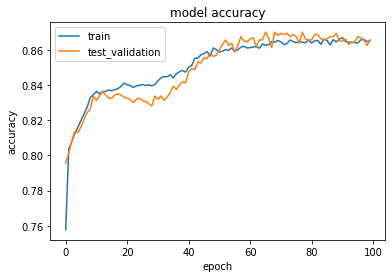

In [53]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test_validation"],loc="upper left")
plt.show()

In [57]:
# predicting the test set result
y_pred = classifier.predict(x_test)

In [59]:
y_pred = (y_pred > 0.5)

In [60]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred) 


In [62]:
cm

array([[1538,   50],
       [ 248,  164]])

In [63]:
acc

0.851